### Problem Description

We're provided with a dataset of 50 companies in Serbia showing how much those companies spent on salaries, HR and marketing (on a yearly basis) and the tax payed. We want to build a model that will predict tax payed by the company, given a relevant data. The problem is that our dataset is quite small. Nevertheless, we will manage to build a model that makes good predictions. 

### The Approach:

This project consists of the following steps:

1. Performing exploratory data analysis
2. Encoding and scaling the data
3. Implementing KNN regression model to make predictions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

First, we import and explore the data.

In [2]:
df_0 = pd.read_csv('../50_companies.csv')
df_0.head()

,Salary,Human Resources,Marketing Spend,City,Tax
0,165349.20,136897.80,471784.10,Belgrade,192261.83
1,162597.70,151377.59,443898.53,Novi Sad,191792.06
2,153441.51,101145.55,407934.54,Nis,191050.39
3,144372.41,118671.85,383199.62,Belgrade,182901.99
4,142107.34,91391.77,366168.42,Nis,166187.94


We also want to make sure that we don't have any missing values.

In [3]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary           50 non-null     float64
 1   Human Resources  50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   City             50 non-null     object 
 4   Tax              50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df = df_0

Now we do some exploratory data analysis.

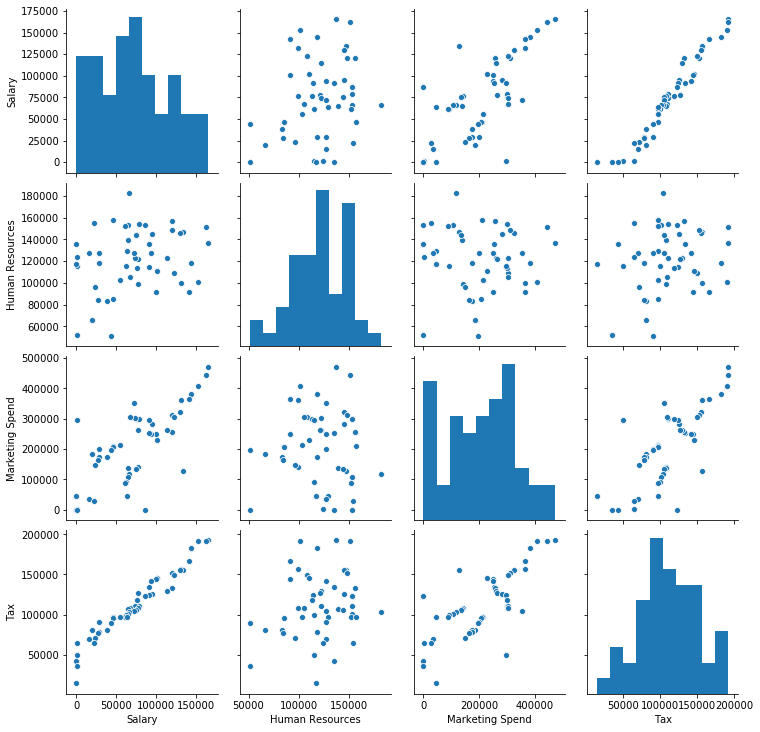

In [5]:
sns.pairplot(df)

We can see a strong correlation between salary and tax. Also, we notice there's some correlation between money spent on marketing and tax. Money invested in HR does not influence taxes. Let's explore these correlations a bit more, using a heatmap.

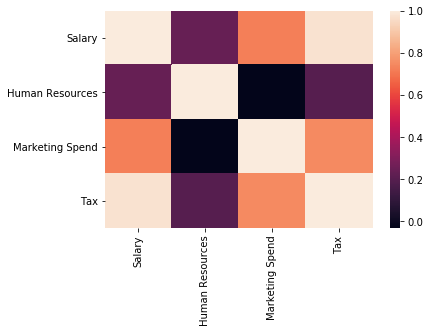

In [6]:
sns.heatmap(df.corr())

As we noticed, there is a considerable correlation betwen salary and tax. The correlation between marketing expenses and taxes is lesser, but still significant. Now we'll explore these correlations using more interactive visualizations.

In [7]:
import plotly as ply
import cufflinks as cf

ply.offline.init_notebook_mode(connected = "True")
cf.go_offline()

In [8]:
df.iplot(x = 'Salary', y = 'Tax', kind = 'scatter', mode = 'markers')

In [9]:
df.iplot(x = 'Marketing Spend', y = 'Tax', kind = 'scatter', mode = 'markers')

### Data Preprocessing

Now we want to train a machine learning model in order to produce prediction based on a given data. We'll use KNN. We'll use tax as a dependent variable, and the rest as independent variables. Before training the model, we need to encode the categorical variable 'City', and then scale all the values.

In [41]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [42]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
X[:,-1] = lab.fit_transform(X[:,-1])
lab.classes_

array(['Belgrade', 'Nis', 'Novi Sad'], dtype=object)

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('ohe', OneHotEncoder(), [3])],
                      remainder= 'passthrough')
X = ct.fit_transform(X)

In [44]:
X = X[:,1:]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train

array([[1.        , 0.        , 0.37493063, 0.48992809, 0.19316302],
       [0.        , 1.        , 0.46116861, 0.47642362, 0.63305328],
       [0.        , 1.        , 0.26652654, 0.        , 0.41762624],
       [0.        , 0.        , 0.46594728, 0.3653876 , 0.29796428],
       [0.        , 0.        , 0.09377566, 0.57930693, 0.07531871],
       [0.        , 1.        , 0.38348453, 0.5932935 , 0.09768292],
       [1.        , 0.        , 0.61635061, 0.45150637, 0.48573267],
       [0.        , 0.        , 0.52264964, 0.77823604, 0.        ],
       [1.        , 0.        , 0.56766982, 0.57883556, 0.52956308],
       [0.        , 0.        , 0.00327821, 0.00350184, 0.        ],
       [1.        , 0.        , 0.7880179 , 0.71745725, 0.68649342],
       [0.        , 0.        , 0.12234465, 0.11163611, 0.39269043],
       [0.        , 0.        , 0.39676926, 0.77456642, 0.22709197],
       [0.        , 1.        , 0.23319442, 0.24130912, 0.3709309 ],
       [1.        , 0.        , 0.

### KNN Implementation

After doing the preprocessing, we can implement KNN. First, we need to decide what is the optimal number of nearest neighbours. 

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [49]:
rmse_vals = []
score_vals = []

for k in range(1,21):
    
    knn = KNeighborsRegressor(n_neighbors = k)
    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    rmse_vals.append(rmse)
    score_vals.append(knn.score(X_test,y_test))

In [50]:
data = {'RMSE' : rmse_vals, 'Score' : score_vals}
performance = pd.DataFrame(data,range(1,21))
performance

,RMSE,Score
1,21921.008905,0.829209
2,19894.985453,0.859320
3,25860.879267,0.762299
4,28455.510216,0.712210
5,32947.431591,0.614178
6,35753.768656,0.545653
7,38758.415746,0.466081
8,41811.452887,0.378653
9,44083.300948,0.309296
10,46520.302920,0.230819


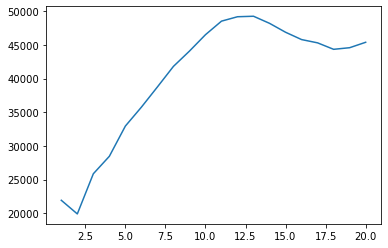

In [51]:
performance['RMSE'].plot()

We pick the optimal value for 'n_neighbours' hyperparameter, and build our KNN model.

In [52]:
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.8593204700232964

### Predicting the new values

Now it's time to predict tax values given a new data. First, we load the new data, check it, and then preprocess it. 

In [53]:
df_new_0 = pd.read_csv('../50_companies_predict.csv')
df_new_0.head()

,Salary,Human Resources,Marketing Spend,City,Tax
0,200072.5320,136897.80,471784.10,Belgrade,NaN
1,196743.2170,151377.59,443898.53,Novi Sad,NaN
2,185664.2271,101145.55,407934.54,Nis,NaN
3,174690.6161,118671.85,383199.62,Belgrade,NaN
4,171949.8814,91391.77,366168.42,Nis,NaN


In [54]:
df_new_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary           50 non-null     float64
 1   Human Resources  50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   City             50 non-null     object 
 4   Tax              0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [55]:
df_new = df_new_0.iloc[:,:-1]

In [56]:
X_pred = df_new.values

In [57]:
X_pred[:,-1] = lab.transform(X_pred[:,-1])
X_pred = ct.transform(X_pred)
X_pred = X_pred[:,1:]
X_pred = scaler.transform(X_pred)

Finally, we can do the prediction.

In [58]:
y_pred = regressor.predict(X_pred)

In [59]:
df_new['Tax Prediction'] = y_pred
df_new

,Salary,Human Resources,Marketing Spend,City,Tax Prediction
0,200072.5320,136897.80,471784.10,Belgrade,172236.800
1,196743.2170,151377.59,443898.53,Novi Sad,170776.010
2,185664.2271,101145.55,407934.54,Nis,173401.495
3,174690.6161,118671.85,383199.62,Belgrade,172236.800
4,171949.8814,91391.77,366168.42,Nis,173401.495
5,159571.0490,99814.71,362861.36,Belgrade,161089.435
6,162884.7066,147198.87,127716.82,Novi Sad,145214.930
7,157660.7373,145530.06,323876.68,Nis,144177.625
8,145856.4492,148718.95,311613.29,Belgrade,141064.405
9,149235.2048,108679.17,304981.62,Novi Sad,142033.655


We check if our predictions are meaningful, i.e. if they are (approximately) normally distributed.

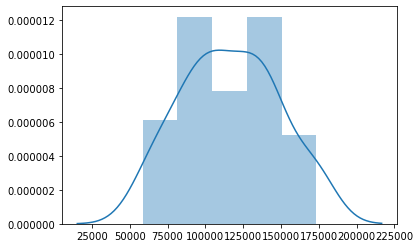

In [60]:
sns.distplot(y_pred)

Now we will build a function that predicts the tax based on the input data.

In [61]:
def make_predictions(model):
    
    #data input
    salary = int(input("Enter salary value: "))
    hr = int(input("Enter invested value into HR: "))
    marketing = int(input("Enter the amount spent for marketing: "))
    vec = [0, 0, salary, hr, marketing]
    
    #encoding the city
    city = int(input("Enter the company' city:\n1 - Belgrade, 2 - Nis, 3 - Novi Sad: "))
    if (city == 2):
        vec[0] = 1
    elif (city == 3):
        vec[1] = 1
     
    #scaling the data
    vec = np.array(vec).reshape(1,-1)
    vec = scaler.transform(vec)
    
    #making prediction
    pred = model.predict(vec)
    
    print(f'The predicted tax amount is: {round(pred[0])}')

In [62]:
make_predictions(regressor)

Enter salary value: 132123
Enter invested value into HR: 90212
Enter the amount spent for marketing: 342123
Enter the company' city:
1 - Belgrade, 2 - Nis, 3 - Novi Sad: 3
The predicted tax amount is: 134117.0
